In [1]:
#!/usr/bin/evn python

import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


In [2]:

# some 3-dim points
mean = np.array([0.0,0.0,0.0])
cov = np.array([[1.0,-0.5,0.8], [-0.5,1.1,0.0], [0.8,0.0,1.0]])
data = np.random.multivariate_normal(mean, cov, 50)

# regular grid covering the domain of the data
X,Y = np.meshgrid(np.arange(-3.0, 3.0, 0.5), np.arange(-3.0, 3.0, 0.5))
XX = X.flatten()
YY = Y.flatten()


In [17]:
data[:10]


array([[ 0.6881764 ,  0.26493667,  0.25926037],
       [ 2.71331063, -0.55116907,  2.05801162],
       [ 1.02143716,  0.56291198,  0.82991584],
       [-0.53630223,  1.31249488,  0.11927146],
       [-1.29103386,  1.67032197,  0.15846487],
       [ 1.43593085,  0.2993747 ,  1.86181803],
       [-1.1786684 ,  0.88437359, -0.57060094],
       [ 1.42980003, -1.40462592,  1.17984151],
       [ 0.38886166,  0.20051804,  0.85174087],
       [-1.44592155,  2.23843275, -0.2436001 ]])

In [ ]:

order = 1    # 1: linear, 2: quadratic
if order == 1:
    # best-fit linear plane
    A = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
    C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])    # coefficients
    
    # evaluate it on grid
    Z = C[0]*X + C[1]*Y + C[2]
    
    # or expressed using matrix/vector product
    #Z = np.dot(np.c_[XX, YY, np.ones(XX.shape)], C).reshape(X.shape)



In [6]:

# best-fit quadratic curve
A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])

# evaluate it on a grid
Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)

In [16]:
C

array([-0.05410288,  0.95146969,  0.42087788, -0.0733967 ,  0.02339251,
       -0.08350751])

In [7]:
A


array([[  1.00000000e+00,   6.88176395e-01,   2.64936672e-01,
          1.82323164e-01,   4.73586751e-01,   7.01914400e-02],
       [  1.00000000e+00,   2.71331063e+00,  -5.51169073e-01,
         -1.49549290e+00,   7.36205456e+00,   3.03787347e-01],
       [  1.00000000e+00,   1.02143716e+00,   5.62911981e-01,
          5.74979215e-01,   1.04333387e+00,   3.16869898e-01],
       [  1.00000000e+00,  -5.36302229e-01,   1.31249488e+00,
         -7.03893931e-01,   2.87620081e-01,   1.72264281e+00],
       [  1.00000000e+00,  -1.29103386e+00,   1.67032197e+00,
         -2.15644221e+00,   1.66676842e+00,   2.78997547e+00],
       [  1.00000000e+00,   1.43593085e+00,   2.99374697e-01,
          4.29881361e-01,   2.06189739e+00,   8.96252089e-02],
       [  1.00000000e+00,  -1.17866840e+00,   8.84373592e-01,
         -1.04238320e+00,   1.38925919e+00,   7.82116650e-01],
       [  1.00000000e+00,   1.42980003e+00,  -1.40462592e+00,
         -2.00833418e+00,   2.04432811e+00,   1.97297398e+00],


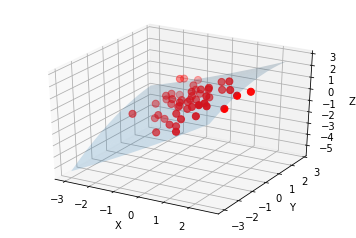

In [4]:


# plot points and fitted surface
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.axis('tight')
plt.show()